In [145]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [146]:
dataset = pd.read_csv("/home/grzesiek/documents/programming/machine_learning/neuron/warsztat-ai/datasets/autentykacja_eeg.csv", delimiter=";")
dataset.head()

,Delta,Theta,Alpha_low,Alpha_high,Beta_low,Beta_high,Gamma_low,Gamma_high,Attention,Meditation,BlinkStrength,Flag
0,785389,114375,57106,37625,24464,17104,15846,8024,45,91,15,1
1,386949,80792,23506,22118,9566,7147,5392,1697,8,42,6,0
2,21453,14085,4756,5062,2176,2117,2867,862,48,66,9,1
3,322637,56936,17810,25793,15870,8050,3621,2100,25,69,8,0
4,19412,12985,6416,6131,7126,7419,2677,1884,80,53,-1,1


# Preparing Data for classifiers

In [147]:
X = dataset.drop(['Flag'], axis=1)

y = dataset['Flag']

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
X_train.shape, X_test.shape

((4195, 11), (1049, 11))

In [150]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree

In [151]:
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=11, random_state=42)

tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [152]:
tree_preds = tree_classifier.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score

print(f'Model accuracy: ~{accuracy_score(y_test, tree_preds)*100:.2f}%')

Model accuracy: ~72.93%


[Text(0.6579249350890207, 0.9583333333333334, 'x[0] <= 575871.5\ngini = 0.48\nsamples = 4195\nvalue = [1678, 2517]'),
 Text(0.41323952151335314, 0.875, 'x[6] <= 6048.0\ngini = 0.496\nsamples = 3445\nvalue = [1575, 1870]'),
 Text(0.1619297106824926, 0.7916666666666666, 'x[7] <= 582.0\ngini = 0.483\nsamples = 2569\nvalue = [1045, 1524]'),
 Text(0.016320474777448073, 0.7083333333333334, 'x[0] <= 41889.0\ngini = 0.363\nsamples = 88\nvalue = [67, 21]'),
 Text(0.013353115727002967, 0.625, 'gini = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(0.019287833827893175, 0.625, 'x[2] <= 8103.0\ngini = 0.5\nsamples = 42\nvalue = [21, 21]'),
 Text(0.011869436201780416, 0.5416666666666666, 'x[7] <= 510.0\ngini = 0.469\nsamples = 32\nvalue = [12, 20]'),
 Text(0.005934718100890208, 0.4583333333333333, 'x[3] <= 6463.5\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.002967359050445104, 0.375, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.008902077151335312, 0.375, 'gini = 0.0\nsamples = 2\nva

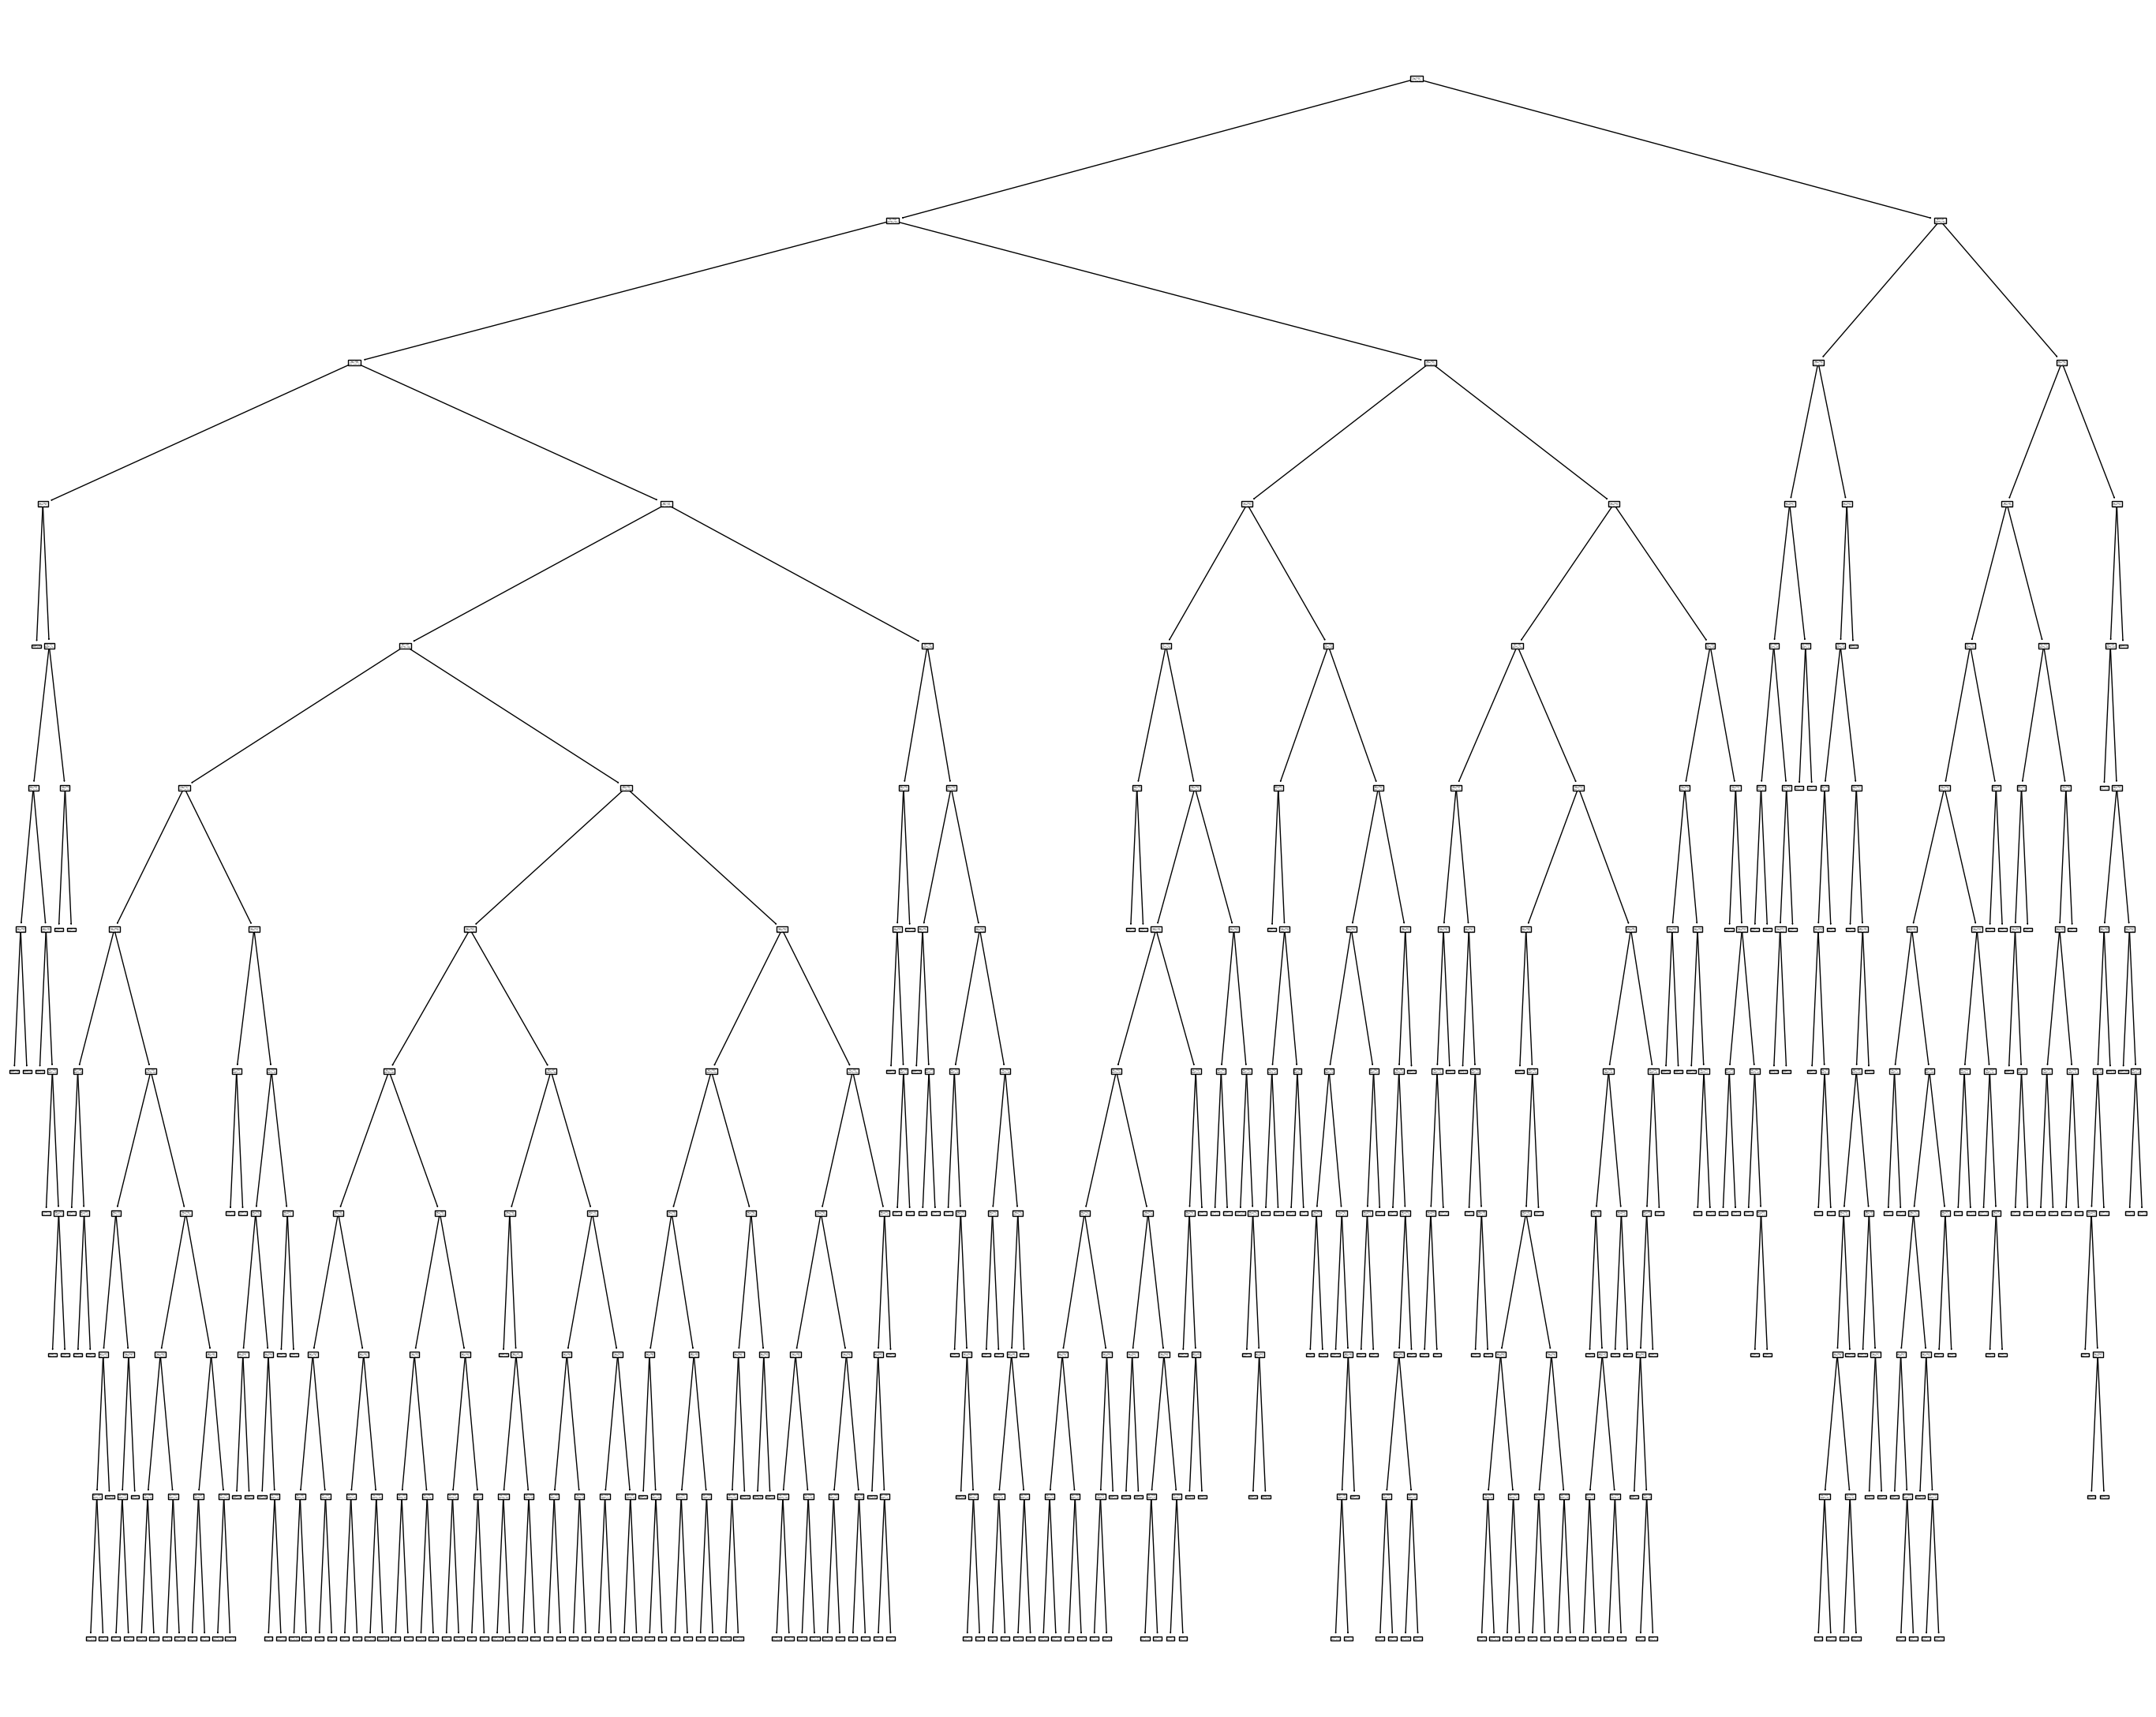

In [154]:
plt.figure(figsize=(35 ,28))

from sklearn import tree

tree.plot_tree(tree_classifier.fit(X_train, y_train)) 

In [155]:
from sklearn.metrics import confusion_matrix

tree_confusion_matrix = confusion_matrix(y_test, tree_preds)

print('Confusion matrix\n\n', tree_confusion_matrix)

Confusion matrix

 [[246 168]
 [116 519]]


In [156]:
def plot_confusion_matrix(preds, kernel=None, y_test=y_test, ax=None):
    confusionMatrix = confusion_matrix(y_test, preds)

    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{kernel} confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

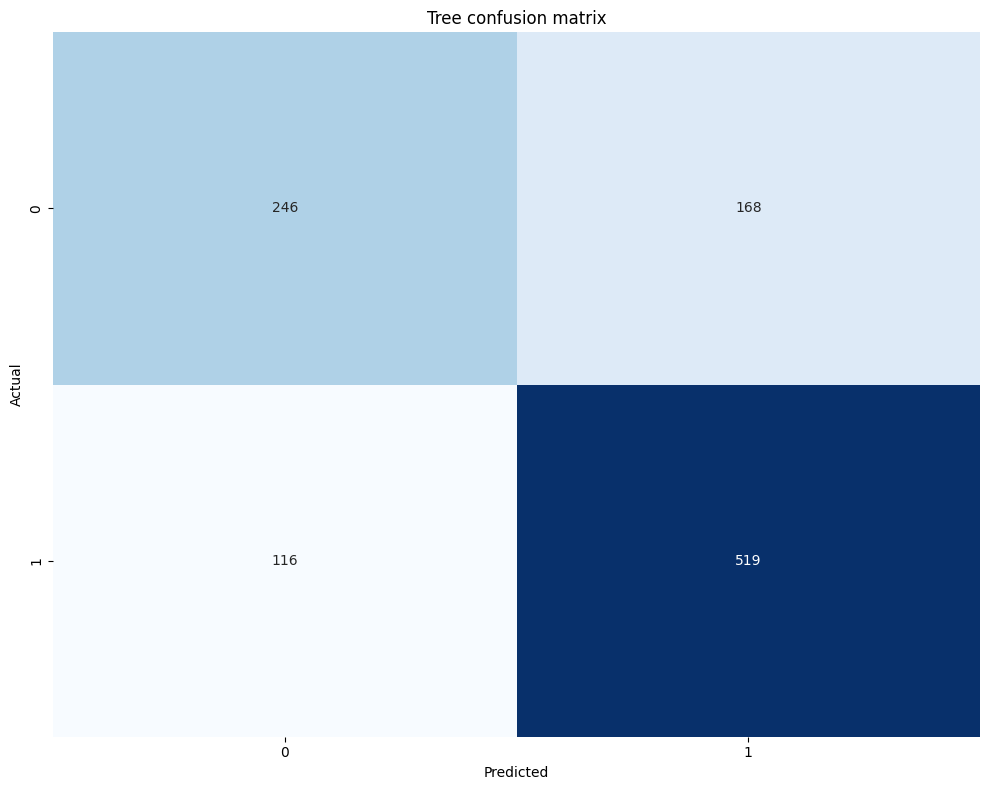

In [157]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
plot_confusion_matrix(tree_preds, ax=axes)
plt.title("Tree confusion matrix")
plt.tight_layout()
plt.show()

In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       414
           1       0.76      0.82      0.79       635

    accuracy                           0.73      1049
   macro avg       0.72      0.71      0.71      1049
weighted avg       0.73      0.73      0.73      1049



In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Support Vector Classification
It's important to remember how sensitive to outliers they are

In [160]:
from sklearn.svm import SVC

In [161]:
def make_svm_predictions(X_train, X_test, y_train, y_test, kernel=None, C_parameter=None):
    if kernel and C_parameter is not None:
        classifier = SVC(kernel=kernel, C=C_parameter)
    else:
        classifier = SVC()
    classifier.fit(X_train, y_train)
    classifier_preds = classifier.predict(X_test)

    print(f'{kernel} classifier accuracy score with C={C_parameter} : {accuracy_score(y_test, classifier_preds) * 100:0.2f}%')
    return classifier_preds

In [162]:
default_preds = make_svm_predictions(X_train, X_test, y_train, y_test)
rbf_preds = make_svm_predictions(X_train, X_test, y_train, y_test, "rbf", C_parameter=100.0)
polynomial_preds = make_svm_predictions(X_train, X_test, y_train, y_test, 'poly', 100.0)
sigmoid_preds = make_svm_predictions(X_train, X_test, y_train, y_test, 'sigmoid', 1.0)
linear_preds = make_svm_predictions(X_train, X_test, y_train, y_test, 'linear', 1.0)

None classifier accuracy score with C=None : 75.31%
rbf classifier accuracy score with C=100.0 : 80.36%
poly classifier accuracy score with C=100.0 : 72.64%
sigmoid classifier accuracy score with C=1.0 : 55.58%
linear classifier accuracy score with C=1.0 : 66.06%


In [163]:
def plot_confusion_matrix(preds, kernel=None, y_test=y_test, ax=None):
    confusionMatrix = confusion_matrix(y_test, preds)

    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{kernel} confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

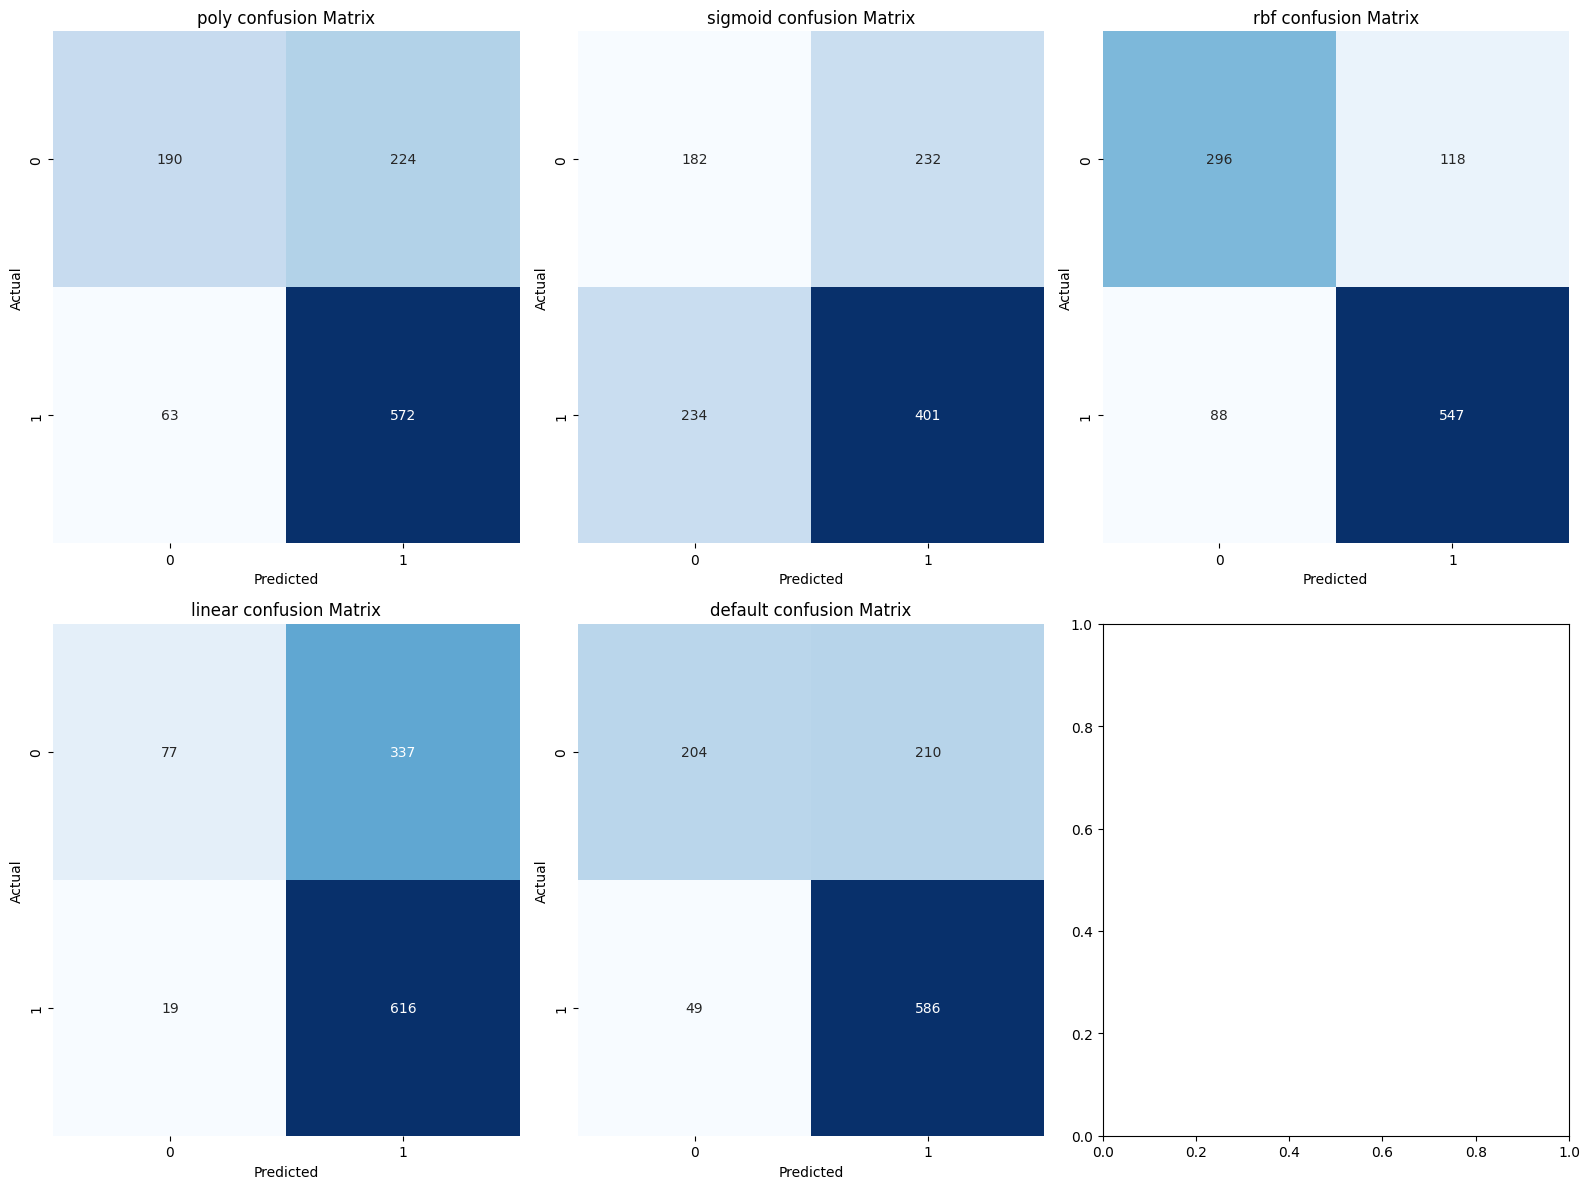

In [179]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
plot_confusion_matrix(polynomial_preds, kernel="poly", ax=axes[0, 0])
plot_confusion_matrix(sigmoid_preds, kernel="sigmoid", ax=axes[0, 1])
plot_confusion_matrix(linear_preds, kernel="linear", ax=axes[1, 0])
plot_confusion_matrix(default_preds, kernel="default", ax=axes[1, 1])
plot_confusion_matrix(rbf_preds, kernel="rbf", ax=axes[0, 2])
plt.tight_layout()
plt.show()


# Naive Bayes

p(a | b)

In [165]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [166]:
def make_bayes_predictions(classifier, X_train, y_train, X_test):
    classifier = classifier    
    classifier.fit(X_train,y_train)
    classifier_preds = classifier.predict(X_test)
    classifier_preds_prob = classifier.predict_proba(X_test)
    train_pred = classifier.predict(X_train)
    print(f'Bayes classifier accuracy score : {accuracy_score(y_test, classifier_preds) * 100:0.2f}%')
    return classifier_preds, classifier_preds_prob

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
bayes_classifier = GaussianNB()
bayes_preds, bayes_pred_prob = make_bayes_predictions(bayes_classifier, X_train, y_train, X_test)

Bayes classifier accuracy score : 55.96%


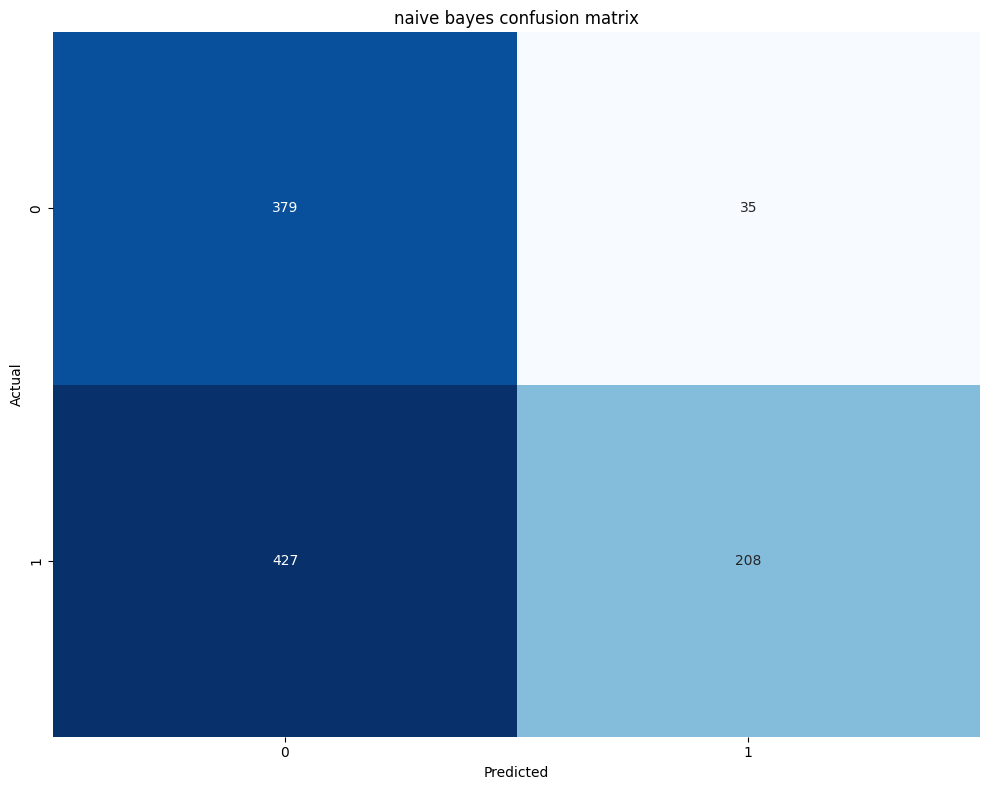

In [180]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
plot_confusion_matrix(bayes_preds, ax=axes)
plt.title("naive bayes confusion matrix")
plt.tight_layout()
plt.show()